<a href="https://colab.research.google.com/github/cassales/Hackathon2024Bootcamp/blob/master/Classification_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification Example

In this following block, we will load the following libraries and functions that we will be using

- pandas :- A library focused on data processing and manipulation
- matplotlib :- A native plotting library seaborn is built upon
- various Sklearn classifiers :- some of the classifiers available within sklearn
- various sklearn metric :- some methods used to evaluate the performance of the classifier

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In the next block, we will download the data files from my homepage in the Waikato University web server

In [ ]:
!wget https://raw.githubusercontent.com/nlim-uow/my_notes/main/fashion-mnist_test.csv
!wget https://github.com/nlim-uow/my_notes/raw/main/partial-fashion-mnist_train.csv.gz


--2024-08-01 03:49:24--  https://raw.githubusercontent.com/nlim-uow/my_notes/main/fashion-mnist_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22176691 (21M) [text/plain]
Saving to: ‘fashion-mnist_test.csv’

fashion-mnist_test. 100%[===================>]  21.15M   139MB/s    in 0.2s    

2024-08-01 03:49:25 (139 MB/s) - ‘fashion-mnist_test.csv’ saved [22176691/22176691]

--2024-08-01 03:49:25--  https://github.com/nlim-uow/my_notes/raw/main/partial-fashion-mnist_train.csv.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nlim-uow/my_notes/main/partial-fashion-mnist_train.csv.gz [follo

In [ ]:
#!gunzip /content/partial-fashion-mnist_test.csv.gz
!gunzip /content/partial-fashion-mnist_train.csv.gz

We will also define some human readable labels

In [ ]:
labels=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

And load and split the data using Pandas as a dataframe

In [ ]:
df_test= pd.read_csv('fashion-mnist_test.csv')
df_train= pd.read_csv('partial-fashion-mnist_train.csv')
X_test=df_test.drop(columns=['label'])
X_train=df_train.drop(columns=['label'])
y_test=df_test['label']
y_train=df_train['label']


Again it is always a good practice to look at the data, and make sure everything is alright. This dataset is clean in this example, but it may not always the the case

In [ ]:
df_train=df_train.fillna(df_train.median())
#df_train.head()


Understanding our data is can help guide our intuition on how can leverage on the data. Here the data contains 28x28 = 784 columns, and the value tells us the intensity of the pixel, knowing this, we can visualize the data

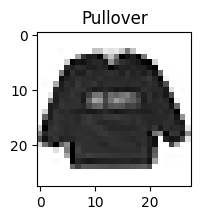

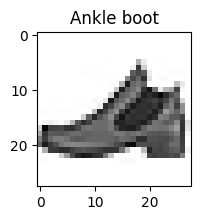

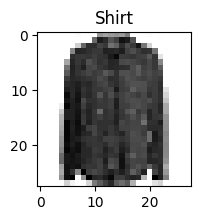

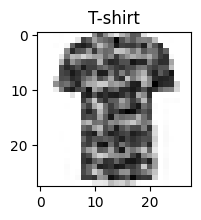

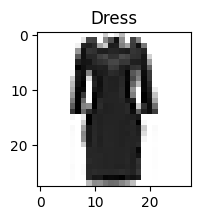

In [ ]:
for id_no in range(5):
  example=X_train.iloc[id_no]
  example_label=y_train.iloc[id_no]
  plt.figure(figsize=(2,2))
  plt.imshow(example.values.reshape(28,28),cmap='binary')
  plt.title(labels[example_label])
  plt.show()

Here we are going to define a simple classifer, in this example we define a **Random Forest Classifer** with 100 members.

In [ ]:
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)

RandomForestClassifier()

Next we evaluate the performance of the classifier on the test dataset and extract some useful performance report. The first is what we call the confusion matrix, this gives us details on which of the examples that are easily confused with each other, and that might give us intuition of what the classifier need help on, and how we might be able to address the shortcoming


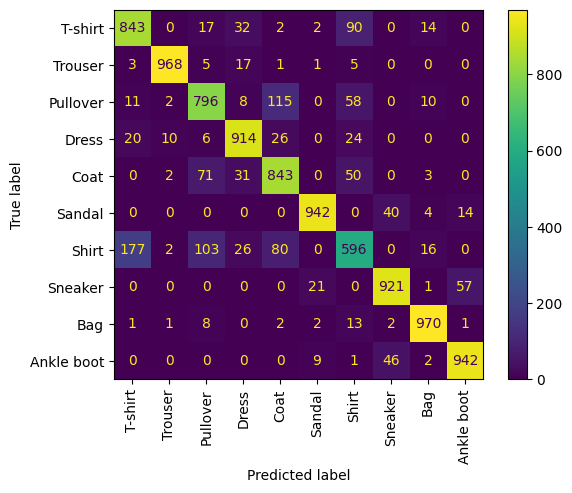

In [ ]:
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm_plot=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
cm_plot.plot(xticks_rotation='vertical')
plt.show()

The next is the classification report, this gives us a measure of how often the classifier gets the example right (precision), and the percentage of examples the classifier catches (recall). This is important, in the cases where the number of examples in each class is not equal.

In [ ]:
print(classification_report(y_test,y_pred,target_names=labels))

              precision    recall  f1-score   support

     T-shirt       0.80      0.84      0.82      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.79      0.80      0.79      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.79      0.84      0.81      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.71      0.60      0.65      1000
     Sneaker       0.91      0.92      0.92      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.93      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Explainable AI is quite an important aspect for machine learning. It is important to understand why the classifier is behaving like it does, and more importantly why it is getting examples wrong.

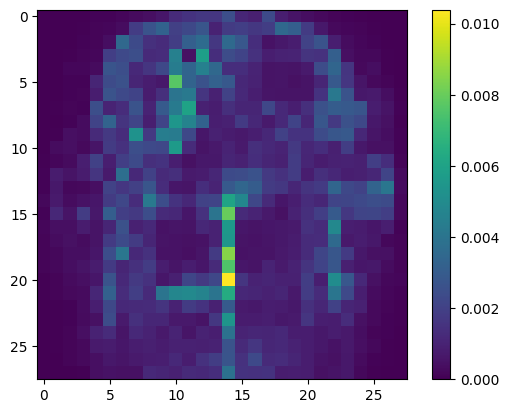

In [ ]:
plt.imshow(classifier.feature_importances_.reshape(28,28))
plt.colorbar()
plt.show()

Let's try this again with a different classifier


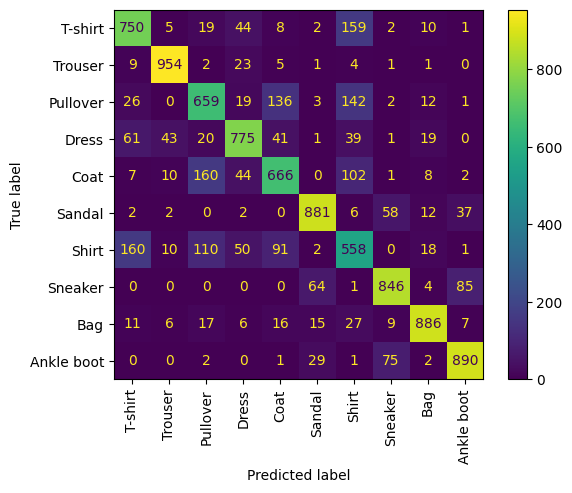

In [ ]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm_plot=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
cm_plot.plot(xticks_rotation='vertical')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred,target_names=labels))

              precision    recall  f1-score   support

     T-shirt       0.73      0.75      0.74      1000
     Trouser       0.93      0.95      0.94      1000
    Pullover       0.67      0.66      0.66      1000
       Dress       0.80      0.78      0.79      1000
        Coat       0.69      0.67      0.68      1000
      Sandal       0.88      0.88      0.88      1000
       Shirt       0.54      0.56      0.55      1000
     Sneaker       0.85      0.85      0.85      1000
         Bag       0.91      0.89      0.90      1000
  Ankle boot       0.87      0.89      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



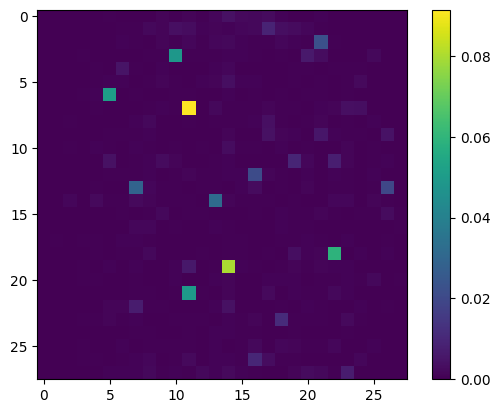

In [ ]:
plt.imshow(classifier.feature_importances_.reshape(28,28))
plt.colorbar()
plt.show()

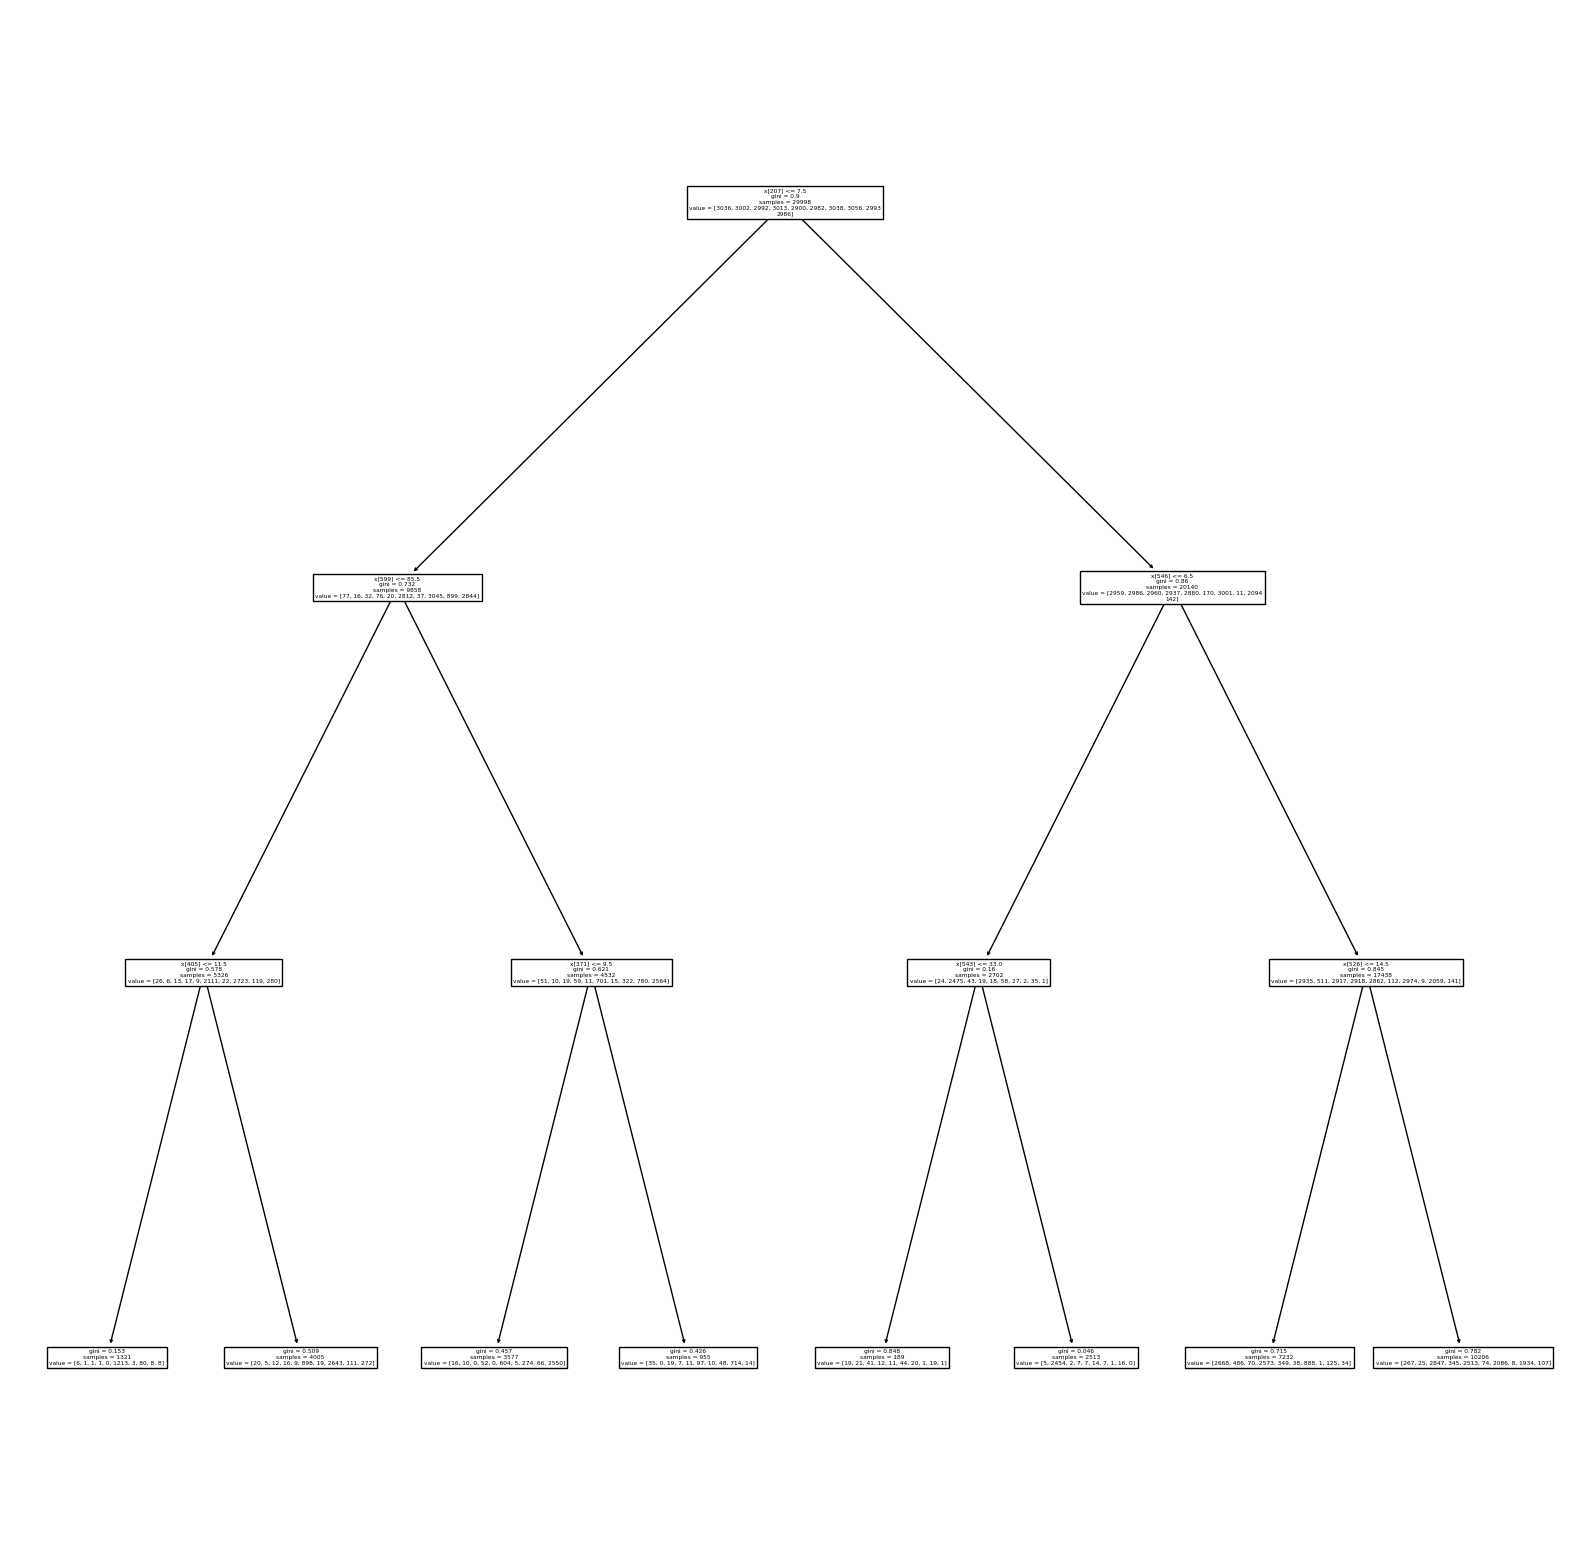

In [ ]:
classifier=DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train,y_train)
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(20,20))
_ = plot_tree(classifier)

In [ ]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


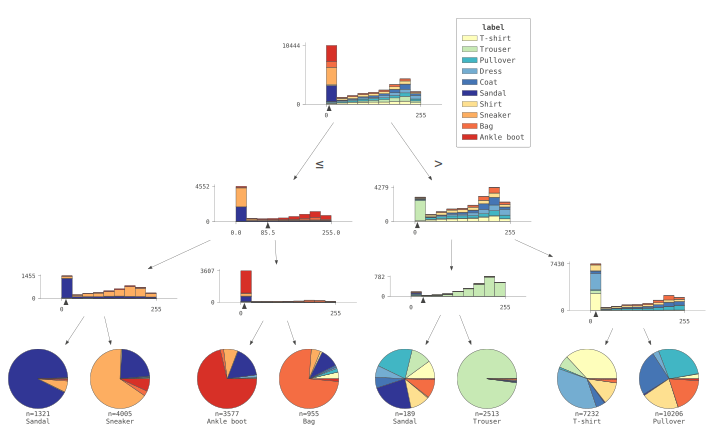

In [ ]:
import dtreeviz
viz=dtreeviz.model(classifier,X_train,y_train,target_name='label',class_names=labels)
viz.view(fontname="monospace")

In [ ]:
dir(viz)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ctree_feature_space',
 'ctree_leaf_distributions',
 'explain_prediction_path',
 'instance_feature_importance',
 'leaf_purity',
 'leaf_sizes',
 'node_stats',
 'rtree_feature_space',
 'rtree_feature_space3D',
 'rtree_leaf_distributions',
 'shadow_tree',
 'view']

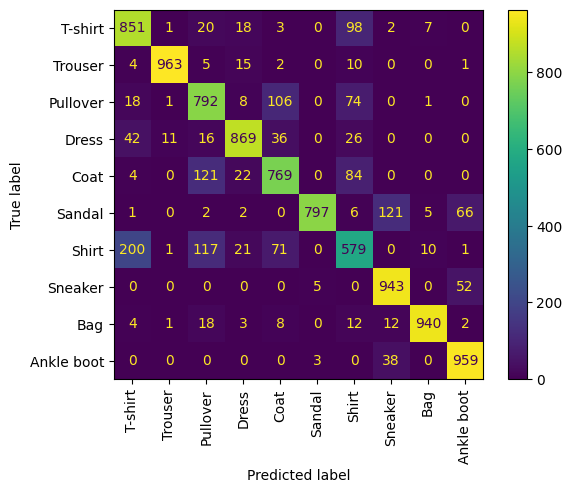

In [ ]:
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm_plot=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
cm_plot.plot(xticks_rotation='vertical')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred,target_names=labels))

              precision    recall  f1-score   support

     T-shirt       0.76      0.85      0.80      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.73      0.79      0.76      1000
       Dress       0.91      0.87      0.89      1000
        Coat       0.77      0.77      0.77      1000
      Sandal       0.99      0.80      0.88      1000
       Shirt       0.65      0.58      0.61      1000
     Sneaker       0.84      0.94      0.89      1000
         Bag       0.98      0.94      0.96      1000
  Ankle boot       0.89      0.96      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
from sklearn.decomposition import IncrementalPCA
pca=IncrementalPCA(n_components=2,batch_size=200)
pca.partial_fit(X_train)


IncrementalPCA(batch_size=200, n_components=2)

In [ ]:
X_test_transform = pca.fit_transform(X_test)

<Axes: >

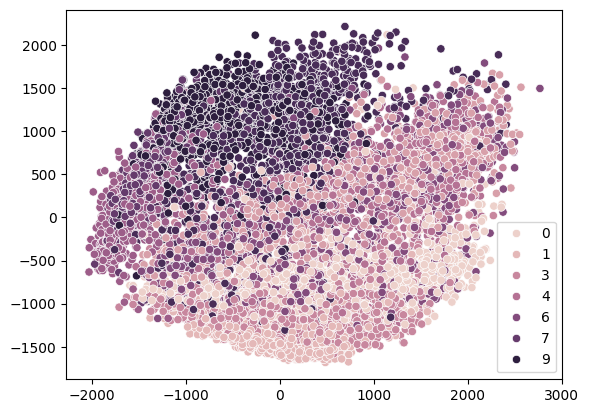

In [ ]:
import seaborn as sns
sns.scatterplot(x=X_test_transform[:,0],y=X_test_transform[:,1], hue=y_pred)